In [30]:
import pandas as pd
import os
import matplotlib as plt
%matplotlib inline

In [31]:
df = pd.read_csv("C:/Users/User/Downloads/churn_prediction.csv")

In [32]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [33]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [34]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [35]:
df['gender'].fillna(value=df['gender'].mode()[0],inplace = True)
df['occupation'].fillna(value=df['occupation'].mode()[0], inplace = True)
df['dependents'].fillna(value=df['dependents'].mean(), inplace = True)
df['days_since_last_transaction'].fillna(value=df['days_since_last_transaction'].mean(), inplace = True)

In [36]:
df.drop(columns=['city','customer_nw_category','current_month_balance','previous_month_end_balance'],axis=1,inplace = True)

In [37]:
df

,customer_id,vintage,age,gender,dependents,occupation,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,previous_month_balance,churn
0,1,3135,66,Male,0.000000,self_employed,755,224.000000,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,0
1,2,310,35,Male,0.000000,self_employed,3214,60.000000,5390.37,7799.26,12419.41,0.56,0.56,5486.27,100.56,8787.61,0
2,4,2356,31,Male,0.000000,salaried,41,69.997814,3913.16,4910.17,2815.94,0.61,0.61,6046.73,259.23,5070.14,0
3,5,478,90,Male,0.347236,self_employed,582,147.000000,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,1669.79,1
4,6,2531,42,Male,2.000000,self_employed,388,58.000000,927.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1677.16,1
5,7,263,42,Female,0.000000,self_employed,1666,60.000000,15202.20,15211.29,13798.82,0.36,0.36,857.50,286.07,15349.75,0
6,8,5922,72,Male,0.000000,retired,1,98.000000,7006.93,7859.74,11232.37,0.64,0.64,1299.64,439.26,7755.98,0
7,9,1145,46,Male,0.000000,self_employed,317,172.000000,10096.58,6511.82,16314.17,0.27,0.27,443.13,5688.44,5317.04,0
8,10,2132,31,Male,0.000000,salaried,4110,19.000000,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1857.42,0
9,11,3379,40,Male,3.000000,self_employed,38,0.000000,4957.95,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,2416.69,0


In [38]:
df.describe()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,925.975019,69.997814,7.380552e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.953388,937.799129,81.290871,4.259871e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,176.000000,13.000000,1.784470e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,572.000000,41.000000,3.281255e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1440.000000,83.000000,6.635820e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,4782.000000,365.000000,5.905904e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.720144e+06,1.000000


In [39]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
previous_month_balance            0
churn                             0
dtype: int64

In [40]:
df['gender'] = df['gender'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes

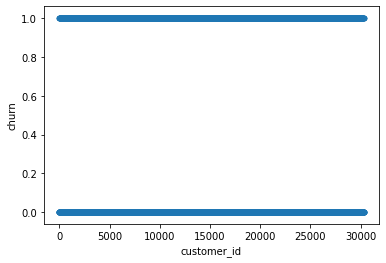

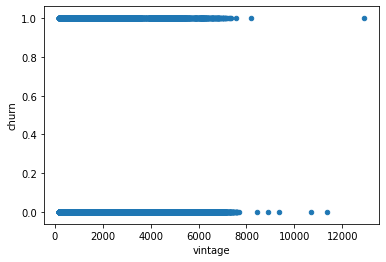

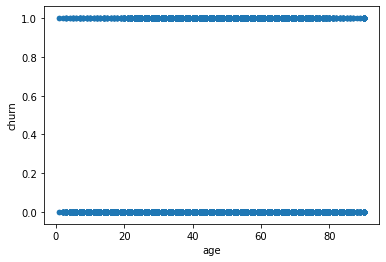

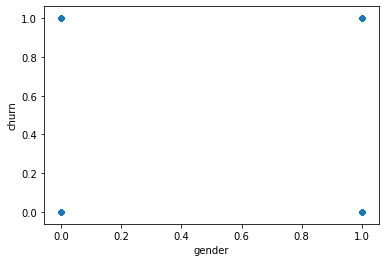

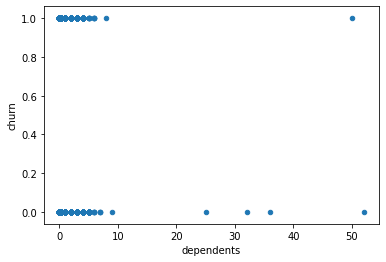

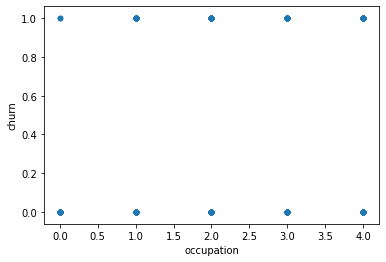

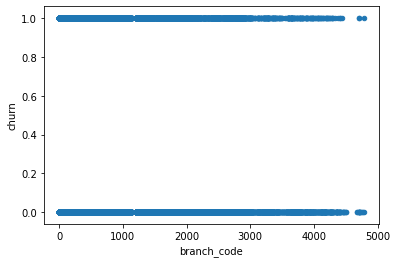

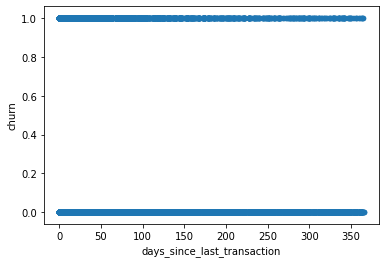

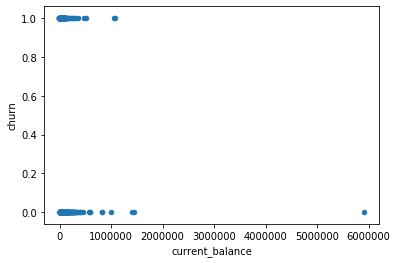

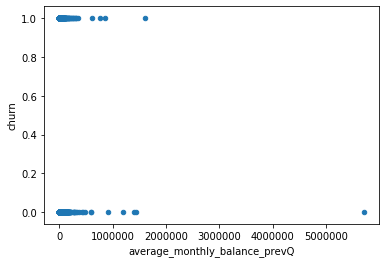

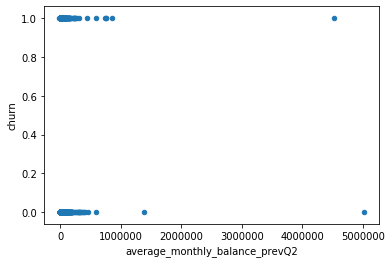

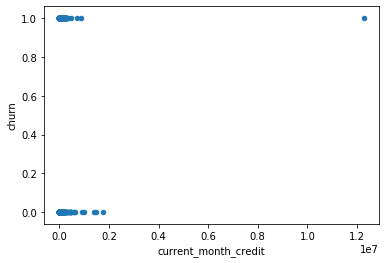

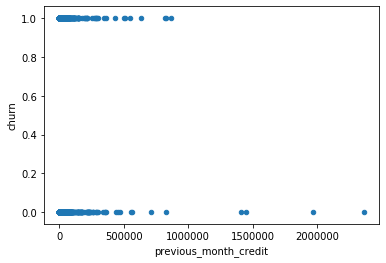

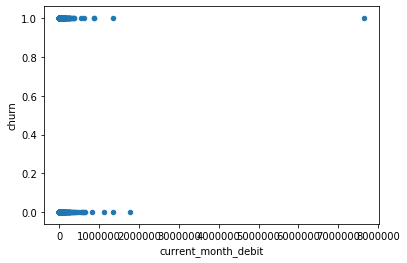

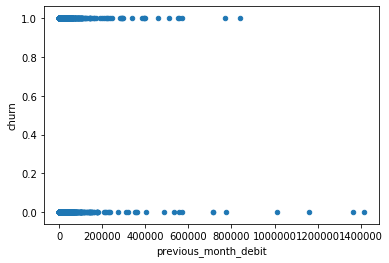

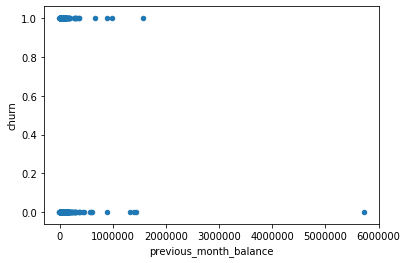

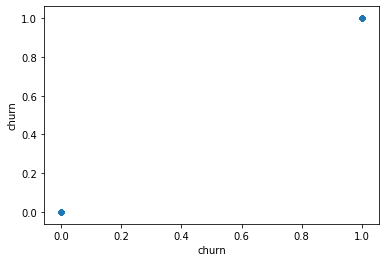

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
i=0
for i in range(0,len(df.columns)):
    df.plot.scatter(i,16)

In [42]:
df[df<0] = 0

In [43]:
df.describe()

,customer_id,vintage,age,gender,dependents,occupation,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.601543,0.347236,2.689451,925.975019,69.997814,7.381755e+03,7.496780e+03,7.127608e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.495539e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.489589,0.953388,0.714303,937.799129,81.290871,4.259845e+04,4.172622e+04,4.457498e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.243190e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.428690e+03,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,0.000000,2.000000,176.000000,13.000000,1.784470e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,1.000000,0.000000,3.000000,572.000000,41.000000,3.281255e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,1.000000,0.000000,3.000000,1440.000000,83.000000,6.635820e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,1.000000,52.000000,4.000000,4782.000000,365.000000,5.905904e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.720144e+06,1.000000


In [44]:
from sklearn import preprocessing

In [45]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled)

In [46]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.232330,0.730337,1.0,0.000000,0.75,0.157708,0.613699,2.469918e-04,0.000005,0.000289,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000255,0.0
1,0.000033,0.010221,0.382022,1.0,0.000000,0.75,0.672035,0.164384,9.127087e-04,0.001118,0.002479,4.482534e-08,2.328724e-07,7.182983e-04,7.110188e-05,0.001536,0.0
2,0.000099,0.171083,0.337079,1.0,0.000000,0.50,0.008366,0.191775,6.625844e-04,0.000611,0.000562,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.000886,0.0
3,0.000132,0.023430,1.000000,1.0,0.006678,0.75,0.121523,0.402740,3.880710e-04,0.000115,0.000201,3.749028e-08,1.947660e-07,6.022631e-08,1.515605e-03,0.000292,1.0
4,0.000165,0.184842,0.460674,1.0,0.038462,0.75,0.080945,0.158904,1.570835e-04,0.000038,0.000373,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.000293,1.0
5,0.000198,0.006526,0.460674,0.0,0.000000,0.75,0.348254,0.164384,2.574068e-03,0.002418,0.002754,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.002683,0.0
6,0.000231,0.451451,0.797753,1.0,0.000000,0.25,0.000000,0.268493,1.186428e-03,0.001128,0.002242,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.001356,0.0
7,0.000264,0.075871,0.505618,1.0,0.000000,0.75,0.066095,0.471233,1.709574e-03,0.000892,0.003256,2.119016e-08,1.100851e-07,5.801627e-05,4.022457e-03,0.000930,0.0
8,0.000297,0.153471,0.337079,1.0,0.000000,0.50,0.859444,0.052055,2.295770e-04,0.000048,0.000225,5.823219e-05,5.126580e-05,9.354718e-05,2.541636e-04,0.000325,0.0
9,0.000330,0.251513,0.438202,1.0,0.057692,0.75,0.007739,0.000000,8.394904e-04,0.000130,0.000372,5.633551e-04,1.780890e-03,2.470968e-04,9.538046e-04,0.000422,0.0


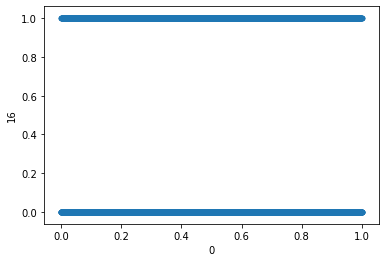

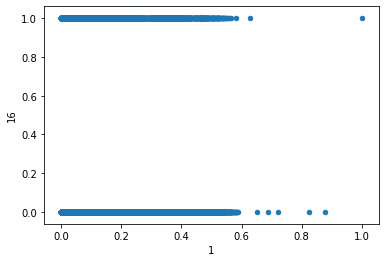

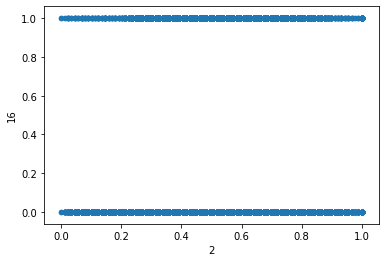

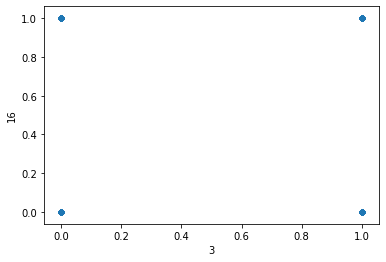

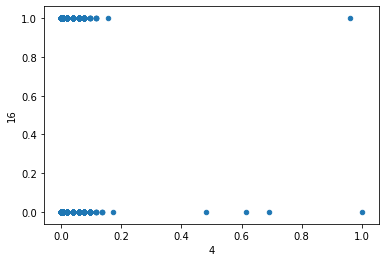

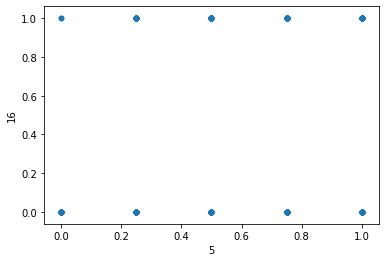

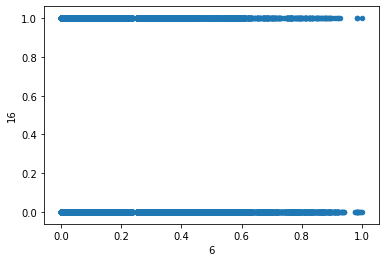

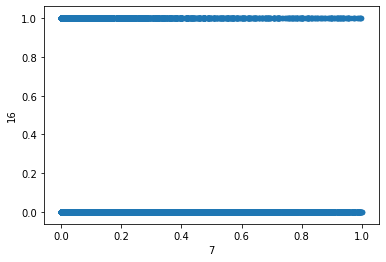

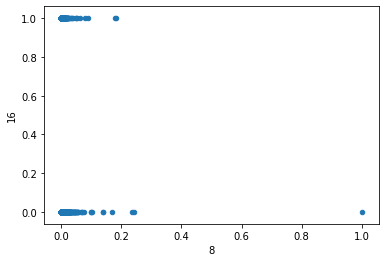

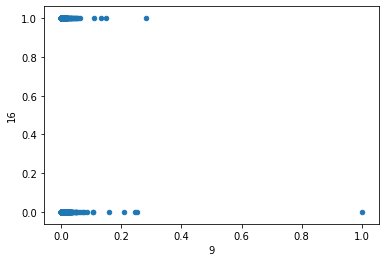

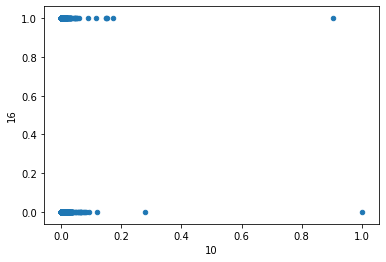

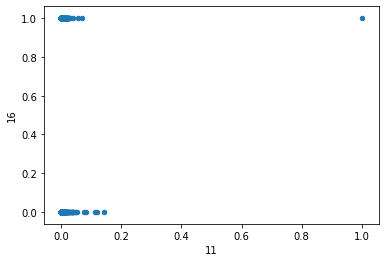

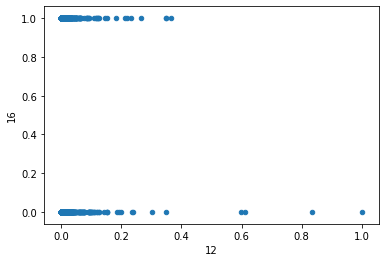

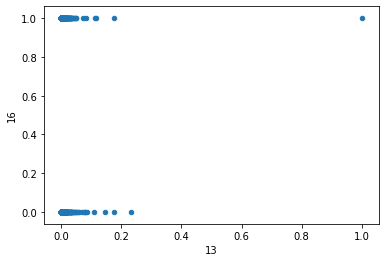

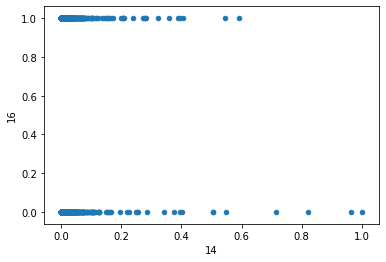

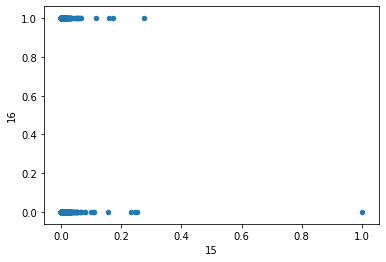

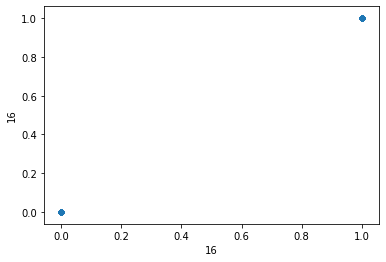

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
i=0
for i in range(0,len(df.columns)):
    df.plot.scatter(i,16)

In [48]:
x=df.drop([16],axis=1)
y=df[16]

In [49]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=90,stratify=y)

In [50]:
test_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
5432,0.190858,0.045994,0.292135,1.0,0.038462,0.50,0.487973,0.087671,0.001139,0.000271,0.000061,8.150062e-09,2.783545e-04,6.164294e-05,6.075091e-04,0.000697
6080,0.213663,0.003695,0.651685,1.0,0.006678,0.75,0.052081,0.531507,0.000246,0.000013,0.000386,1.304010e-08,6.774470e-08,2.094828e-08,1.131407e-07,0.000253
18437,0.649307,0.192153,0.696629,1.0,0.038462,0.75,0.034721,0.063014,0.000436,0.000743,0.001743,1.164309e-03,7.621279e-08,1.689727e-03,1.800126e-03,0.000369
19338,0.681221,0.057394,0.719101,1.0,0.000000,0.75,0.382765,0.038356,0.000557,0.000377,0.000853,1.771171e-05,7.621279e-08,4.117123e-05,1.272833e-07,0.000627
22990,0.809472,0.076342,0.438202,1.0,0.000000,0.50,0.315624,0.046575,0.000310,0.000031,0.000149,2.159603e-05,2.936521e-04,7.774955e-05,4.879194e-07,0.000307
3688,0.129769,0.149619,0.483146,0.0,0.000000,0.75,0.007948,0.008219,0.001088,0.001300,0.000737,2.682903e-04,4.246628e-03,7.892593e-04,9.093240e-03,0.001763
25223,0.888614,0.094504,0.494382,1.0,0.000000,0.50,0.270236,0.065753,0.001783,0.001483,0.008376,1.605716e-03,7.127251e-04,5.289140e-04,4.208976e-04,0.001175
7518,0.264158,0.014073,0.483146,0.0,0.000000,0.75,0.350345,0.189041,0.000237,0.000104,0.000408,4.238032e-08,2.201703e-07,1.683412e-03,1.013882e-04,0.000009
28245,0.995215,0.333438,0.483146,0.0,0.000000,0.75,0.126543,0.126027,0.000381,0.000108,0.000360,1.222509e-08,1.844477e-04,1.963902e-08,1.060694e-07,0.000362
12384,0.436469,0.202532,0.573034,1.0,0.000000,0.50,0.113156,0.008219,0.000281,0.000039,0.000152,1.548944e-04,1.357422e-03,2.072505e-04,1.879791e-03,0.000208


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
y_predict = clf.predict(test_x)

In [52]:
print("accuracy:",metrics.accuracy_score(test_y,y_predict))

accuracy: 0.7894588500563697


In [53]:
# print(test_x.dtypes)
user_input = [None]*16
for i in range(0,len(test_x.columns)):
    user_input[i] = input()
user_input = pd.DataFrame([user_input])
frame = [test_x,user_input]
test_x = pd.concat(frame)
print(test_x)

30306
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
              0            1          2  3           4     5           6   \
5432    0.190858    0.0459942   0.292135  1   0.0384615   0.5    0.487973   
6080    0.213663   0.00369526   0.651685  1  0.00667761  0.75   0.0520812   
18437   0.649307     0.192153   0.696629  1   0.0384615  0.75   0.0347208   
19338   0.681221    0.0573944   0.719101  1           0  0.75    0.382765   
22990   0.809472    0.0763425   0.438202  1           0   0.5    0.315624   
3688    0.129769     0.149619   0.483146  0           0  0.75  0.00794813   
25223   0.888614    0.0945043   0.494382  1           0   0.5    0.270236   
7518    0.264158    0.0140734   0.483146  0           0  0.75    0.350345   
28245   0.995215     0.333438   0.483146  0           0  0.75    0.126543   
12384   0.436469     0.202532   0.573034  1           0   0.5    0.113156   
16277   0.573234    0.0373457   0.382022  0           0   0.5    0.385484   
3340    0.117426     0.192861   0.404494

In [56]:
test_x = min_max_scaler.fit_transform(test_x)

In [57]:
y_pre = clf.predict(test_x)
print(y_pre[-1])

0.0
